# Library

In [ ]:
!pip install torchvision

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.models as models
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder

# Image

이미지와 같은 2D, 3D 데이터를 처리하고 분석하기 위해 설계된 딥러닝 모델. <br>
이미지는 다양한 형식과 색상 채널로 표현될 수 있으며, 컴퓨터가 이미지 데이터를 처리하고 해석할 수 있도록 각 픽셀에 숫자로 값을 할당. <br>

<br>

<font style="font-size:18px"> 사용 방법 </font>

> ```python
> image = Image.open(<path>)
> image = np.array(image)
> 
> image.shape         # 이미지 크기 및 채널 확인
> plt.imshow(image)   # 이미지 시각화    
> plt.hist(np.array(image).ravel(), bins=range(256))    # 데이터 분포 시각화
> ```

## 픽셀(Pixel)
픽셀은 이미지의 가장 작은 단위로, 각 픽셀은 특정 위치의 색상 정보를 담고 있음. <br>
픽셀이 모여 이미지 전체를 구성하며, 해상도는 이미지의 픽셀 수로 결정. <br>
ex) 1920x1080 해상도라면, 가로 1920픽셀, 세로 1080픽셀

##  색상 모델
RGB (Red, Green, Blue): 각 픽셀은 세 가지 색상 값으로 정의. <br>
&nbsp;&nbsp;&nbsp;&nbsp;색상 강도에 따라 다양한 색을 만듦. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ex) [255, 0, 0]: 빨간색 <br>
Grayscale: 흑백 이미지의 경우 픽셀당 하나의 값으로 정의되며, 밝기만 표현. <br>
&nbsp;&nbsp;&nbsp;&nbsp; ex) 0: 검정, 255: 흰색 <br>

## 데이터 타입

이미지 데이터는 주로 uint8(0~255)이나 float32(0~1 범위) 데이터 타입으로 표현. <br>
각 픽셀이 표현할 수 있는 범위와 정밀도에 영향을 미침. <br>

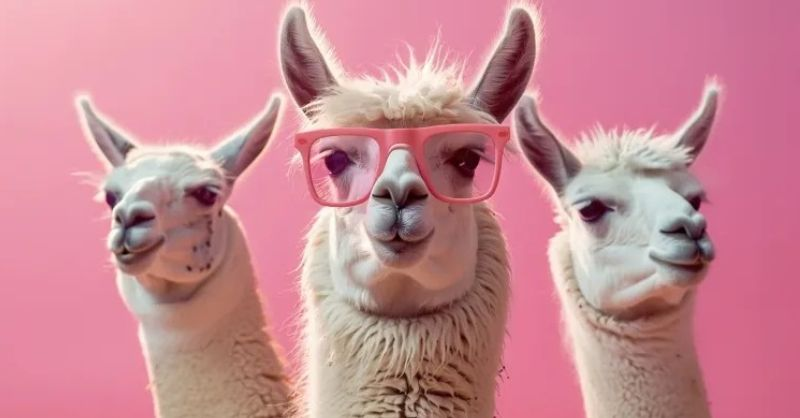

In [15]:
image = Image.open('./images/llama.jpg')
image

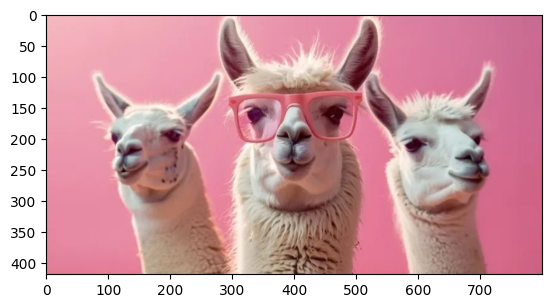

In [16]:
# 이미지를 NumPy 배열로 변환
image = np.array(image)

# 변환된 이미지를 표시
plt.imshow(image)

In [19]:
# 이미지의 형태(차원)를 출력
print(image.shape)  # height, width, channel

(418, 800, 3)

In [22]:
# 이미지의 픽셀 값을 0과 1 사이로 정규화
normalized_image = image / 255

array([[[0.96862745, 0.72941176, 0.76078431],
        [0.96862745, 0.72941176, 0.76078431],
        [0.96862745, 0.72941176, 0.76078431],
        ...,
        [0.78039216, 0.41960784, 0.57254902],
        [0.78039216, 0.41960784, 0.57254902],
        [0.78039216, 0.41960784, 0.57254902]],

       [[0.96862745, 0.72941176, 0.76078431],
        [0.96862745, 0.72941176, 0.76078431],
        [0.96862745, 0.72941176, 0.76078431],
        ...,
        [0.78039216, 0.41960784, 0.57254902],
        [0.78039216, 0.41960784, 0.57254902],
        [0.78039216, 0.41960784, 0.57254902]],

       [[0.96862745, 0.72941176, 0.76078431],
        [0.96862745, 0.72941176, 0.76078431],
        [0.96862745, 0.72941176, 0.76078431],
        ...,
        [0.78039216, 0.41960784, 0.57254902],
        [0.78039216, 0.41960784, 0.57254902],
        [0.78039216, 0.41960784, 0.57254902]],

       ...,

       [[0.87843137, 0.49019608, 0.57254902],
        [0.87843137, 0.49019608, 0.57254902],
        [0.87843137, 0

(array([  332.,   155.,   155.,   188.,   184.,   199.,   195.,   218.,
          246.,   228.,   218.,   216.,   220.,   217.,   237.,   208.,
          235.,   254.,   278.,   252.,   247.,   274.,   252.,   287.,
          284.,   289.,   330.,   318.,   360.,   342.,   338.,   329.,
          337.,   367.,   355.,   346.,   384.,   415.,   440.,   458.,
          462.,   448.,   461.,   460.,   458.,   539.,   551.,   559.,
          589.,   586.,   708.,   679.,   734.,   747.,   751.,   790.,
          817.,   846.,   860.,   883.,   848.,   977.,   994.,  1047.,
         1056.,  1089.,  1222.,  1133.,  1164.,  1266.,  1367.,  1415.,
         1582.,  1589.,  1680.,  1700.,  1827.,  1860.,  1931.,  1968.,
         2125.,  2080.,  2075.,  2202.,  2246.,  2446.,  2639.,  2789.,
         2936.,  3068.,  2967.,  3103.,  3246.,  3310.,  3391.,  3433.,
         3702.,  3658.,  4486.,  5222.,  5280.,  5254.,  5483.,  6160.,
         6705.,  7970.,  8571.,  6484.,  5141.,  4581.,  4955., 

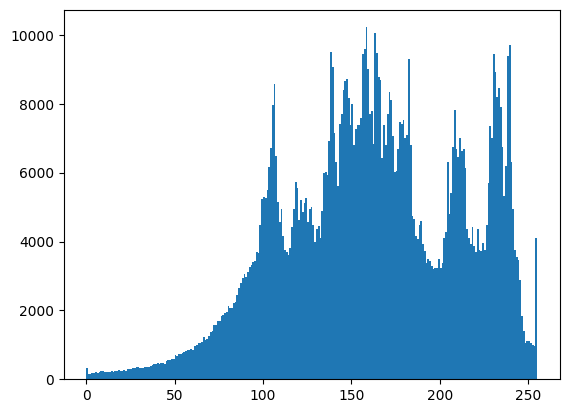

In [26]:
# 히스토그램을 그리기 위해 픽셀 값을 0~255의 범위로 설정
plt.hist(
    image.flatten(), # 이미지를 1차원 배열로 평탄화
    bins=range(256),
    )


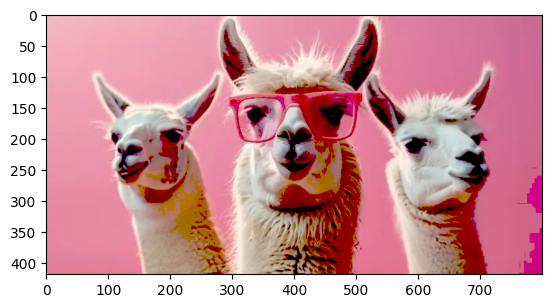

In [32]:
# 픽셀 값이 100보다 작은 경우 0으로 설정하고, 그렇지 않으면 원래 값을 유지
modified_image = np.where(image < 100, 0, image)

# 수정된 이미지를 표시
plt.imshow(modified_image)

# CNN

![](https://kr.mathworks.com/discovery/convolutional-neural-network/_jcr_content/mainParsys/band_copy_copy/mainParsys/lockedsubnav/mainParsys/columns/a32c7d5d-8012-4de1-bc76-8bd092f97db8/image_2109075398_cop.adapt.full.medium.jpg/1726854220582.jpg)

<br>

이미지나 영상 데이터를 처리할 때 사용하는 신경망. <br>
기존 MLP에서의 단점을 극복하기 위해 등장. <br>
- 1차원 형태의 데이터를 사용 <br>
    -> 이미지가 입력값이 되는 경우 이것을 flatten시켜서 한줄 데이터로 만들어야 함 <br>
    -> 이미지의 공간적/지역적 정보 손실 <br>

<br>

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F9ohaU%2FbtrcQeFyr7E%2F1o2fBA58Qkj6Ol0xDQ9Yq0%2Fimg.png">

<br>
<br>

<font style="font-size=20px"> 특징 </font>

공간 불변성: 지역적 연결성과 공유 가중치를 통해 이미지의 위치에 상관없이 패턴 인식 가능. <br>
효율적인 특징 학습: 이미지 내 feature를 자동으로 학습.
파라미터 수 감소: 전통적인 신경망에 비해 학습해야 하는 파라미터 수가 훨씬 적어, 메모리와 연산 시간을 절약 가능. <br>

### Layers

Convolusion -> Batch Normalization -> Activation -> Dropout -> Pooling

#### Convolution

filter를 이용해 이미지를 스캔하면서 특징을 추출. <br>
filter는 학습 과정에서 업데이트. <br>
다양한 필터를 통해 이미지의 중요한 패턴을 탐지. <br>

<br>

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/08/unnamed-1-66c705a22fa6a.webp)

input data와 kernel의 곱이 convolution 연산의 결과. <br>

<br>
<br>

<img src="https://lh7-us.googleusercontent.com/docsz/AD_4nXdfE-2dS9aCrVlZJlg7jtDLoCTHI29DD-4dcxom5Ijxfi8KZKLsMbePOZLtvN9mgOTPoF-Rn_Ke5A5GwcjGzV0Pkjm-Oz4PM2ZekHsanQwU3Toe33XGcniguHltnnvpi-hT9Hzs478z1MN8F4OZ1IVSqKVK?key=PIVNinr1t51KdquqBb8aBA" width="400">

단일 채널에서는 위와 같은 동작 방식으로 이미지의 주요 feature 추출. <br>

<br>
<br>

<img src="https://lh7-us.googleusercontent.com/docsz/AD_4nXfQFRxbSUI_QBKQoPX-TxjRcmPfTh7Dco4tQYOXv4ajDmikWJ1Jo5qkrDdVh5poM5jtq1cEJuluRkZ7HmQ6Fov3bgewMf3hFzlwm2UQg7RPzCP2HqvRZqAm7alxeGtJT37UHjOR4yKGbRY4UwWM82qoLin8?key=PIVNinr1t51KdquqBb8aBA" width="400">

RGB 3채널에 대해서 위와 같은 연산을 통해 이미지의 주요 feature 추출. <br>

<br>
<br>

> ```python
> nn.Conv2d(
>     in_channels,     # (int) 입력 채널 수. 예를 들어, RGB 이미지라면 3, 흑백 이미지라면 1.
>     out_channels,    # (int) 출력 채널 수. filter의 개수. 생성될 출력 텐서의 채널 수.
>     kernel_size,     # (int or tuple) 필터의 크기. 정수 하나를 입력하면 정사각형 커널이 생성되고, (height, width) 형태의 튜플로 입력하면 다양한 크기의 커널을 정의 가능.
>     stride=1,        # (int or tuple) 스트라이드. 필터를 적용할 때 이동하는 간격.
>     padding='same',  # (int, tuple, or str) 패딩. 'same'으로 설정하면 입력과 동일한 크기의 출력을 얻도록 패딩을 자동으로 추가.
> )
> ```

<br>
<br>

<img src="https://blog.kakaocdn.net/dn/mejUU/btq9rcLrCuK/okInSFUuqrxBerzxisxUWK/img.png" width="400">

필터의 수 (out_channels)

In [33]:
# 랜덤한 텐서 생성: 배치 크기 32, 시퀀스 길이 10, 특성 차원 64
x = torch.randn(32, 10, 64)

# 선형 변환 정의: 입력 차원 64, 출력 차원 20
linear_layer = nn.Linear(64, 20)

# 선형 변환을 텐서 x에 적용
output = linear_layer(x)  # 출력의 차원: (32, 10, 20)

In [196]:
# 정규화된 이미지의 차원 추력
print(torch.Tensor(image/255).shape)


# 텐서의 차원 순서를 변경 (채널, 높이, 너비)
# 일반적으로 이미지 데이터는 (높이, 너비, 채널) 형식으로, (채널, 높이, 너비) 형식으로 변환
print(torch.Tensor(image/255).permute(2, 0, 1).shape)

torch.Size([418, 800, 3])
torch.Size([3, 418, 800])


In [50]:
# 이미지의 픽셀 값을 0과 1 사이로 정규화
normalized_image = image / 255

# 정규화된 이미지를 PyTorch 텐서로 변환하고 차원 순서를 변경 (채널, 높이, 너비)
tensor_image = torch.Tensor(normalized_image).permute(2, 0, 1)

# 2D 합성곱 계층 정의: 입력 채널 3, 출력 채널 20, 커널 크기 3x3
conv_layer = nn.Conv2d(3, 20, kernel_size=3)

# 합성곱 계층에 텐서를 통과시켜 출력 차원 확인
output_shape = conv_layer(tensor_image).shape

# 출력 차원 출력
print(output_shape)

torch.Size([20, 416, 798])

In [51]:
# 이미지를 NumPy 배열로 변환 (여기서 image는 이미 존재하는 배열)
image = np.array(image)

# 이미지의 픽셀 값을 0과 1 사이로 정규화
normalized_image = image / 255

# 정규화된 이미지를 PyTorch 텐서로 변환하고 차원 순서를 변경 (채널, 높이, 너비)
tensor_image = torch.Tensor(normalized_image).permute(2, 0, 1)

# 2D 합성곱 계층 정의: 입력 채널 3, 출력 채널 20, 커널 크기 3x3, padding='same'
conv_layer = nn.Conv2d(3, 20, kernel_size=3, padding='same')

# 합성곱 계층에 텐서를 통과시켜 출력 차원 확인
output_shape = conv_layer(tensor_image).shape

# 출력 차원 출력
print(output_shape)

torch.Size([20, 418, 800])

##### Stride

filter가 이동하는 간격. <br>
스트라이드를 조절하여 출력 크기를 조절. <br>

|Stride1|Stride2|
|-------|-------|
|<img src="https://blog.kakaocdn.net/dn/cw9NJP/btq9lm8tGOR/VwhByeUuXkngvKRjZGH6Ek/img.png" width="400">|<img src="https://blog.kakaocdn.net/dn/b4Xfby/btq9reCaQMQ/bz6krxDnK5WOrYAbdBQrd1/img.png" width="400">|

In [53]:
# 이미지의 픽셀 값을 0과 1 사이로 정규화
normalized_image = image / 255

# 정규화된 이미지를 PyTorch 텐서로 변환하고 차원 순서를 변경 (채널, 높이, 너비)
tensor_image = torch.Tensor(normalized_image).permute(2, 0, 1)

# 2D 합성곱 계층 정의: 입력 채널 3, 출력 채널 20, 커널 크기 3x3, 스트라이드 2
conv_layer = nn.Conv2d(3, 20, kernel_size=3, stride=2)

# 합성곱 계층에 텐서를 통과시켜 출력 차원 확인
output_shape = conv_layer(tensor_image).shape

# 출력 차원 출력
print(output_shape)

torch.Size([20, 208, 399])

##### Padding

![](https://blog.kakaocdn.net/dn/cdOy22/btrtlozFpnC/YNIxV0GqqwcL3nNR3yz1Y0/img.gif)

filter가 이미지의 가장자리에 도달했을 때 데이터를 잃지 않도록 이미지를 0으로 채워 둘러싸는 방법. <br>
이를 통해 원래 이미지 크기를 유지할 수 있음. <br>

#### Pooling

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2024/08/597371-kqieqhxzicu7thjaqbfpbq-66c7045e59b1e.webp" width="400">

특성을 요약하여 데이터 크기를 줄이고 연산 효율을 높입. <br>
convolution의 연산 결과에 적용. <br>

<br>

Max Pooling: 최대 픽셀 값을 찾음. <br>
-> 노이즈가 있는 활성화를 완전히 제거하고, 차원 축소와 함께 디노이징 수행. <br>

Average Pooling: 모든 값의 평균 반환. <br>
-> 노이즈 억제 메커니즘으로서 차원 축소를 수행.

In [61]:
# 이미지의 픽셀 값을 0과 1 사이로 정규화
normalized_image = image / 255

# 정규화된 이미지를 PyTorch 텐서로 변환하고 차원 순서를 변경 (채널, 높이, 너비)
tensor_image = torch.Tensor(normalized_image).permute(2, 0, 1)

# 2D 합성곱 계층 정의: 입력 채널 3, 출력 채널 20, 커널 크기 3x3, padding='same'
conv_layer = nn.Conv2d(3, 20, kernel_size=3, padding='same')

# 합성곱 계층에 텐서를 통과시켜 출력 차원 확인
conv_out = conv_layer(tensor_image)

# 출력 차원 출력
print(conv_out.shape)

torch.Size([20, 418, 800])

In [60]:
# 이미지의 픽셀 값을 0과 1 사이로 정규화
normalized_image = image / 255

# 정규화된 이미지를 PyTorch 텐서로 변환하고 차원 순서를 변경 (채널, 높이, 너비)
tensor_image = torch.Tensor(normalized_image).permute(2, 0, 1)

# 2D 합성곱 계층 정의: 입력 채널 3, 출력 채널 20, 커널 크기 3x3, padding='same'
conv_layer = nn.Conv2d(3, 20, kernel_size=3, padding='same')

# 합성곱 계층에 텐서를 통과시켜 출력 생성
conv_out = conv_layer(tensor_image)

# 최대 풀링 계층 정의: 커널 크기 2x2
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# 최대 풀링 계층에 합성곱 출력을 통과시켜 출력 차원 확인
pooled_out = max_pool_layer(conv_out)

# 출력 차원 출력
print(pooled_out.shape)

torch.Size([20, 209, 400])

#### Fully Connected Layer

최종 예측을 위한 layer. <br>
이전 층에서 추출한 특징을 바탕으로 이미지가 어떤 클래스에 속하는지 예측. <br>
전통적인 다층 퍼셉트론처럼 동작하며, CNN의 분류 결과를 출력. <br>

In [62]:
# 이미지의 픽셀 값을 0과 1 사이로 정규화
normalized_image = image / 255

# 정규화된 이미지를 PyTorch 텐서로 변환하고 차원 순서를 변경 (채널, 높이, 너비)
tensor_image = torch.Tensor(normalized_image).permute(2, 0, 1)

# 2D 합성곱 계층 정의: 입력 채널 3, 출력 채널 20, 커널 크기 3x3, padding='same'
conv_layer = nn.Conv2d(3, 20, kernel_size=3, padding='same')

# 합성곱 계층에 텐서를 통과시켜 출력 생성
conv_out = conv_layer(tensor_image)

# 최대 풀링 계층을 통해 합성곱 출력에 최대 풀링 적용
max_out = nn.MaxPool2d(kernel_size=2)(conv_out)

In [71]:
# 최대 풀링 결과를 평탄화 (flatten)
flattened_out = max_out.flatten()

# 선형 계층 정의: 입력 크기 1672000, 출력 크기 2
linear_layer = nn.Linear(1672000, 2)

# 평탄화된 출력을 선형 계층에 통과시켜 최종 출력 생성
linear_out = linear_layer(flattened_out)

linear_out

tensor([ 0.0668, -0.0017], grad_fn=<ViewBackward0>)

## Augmentation

reference: https://pytorch.org/vision/main/transforms.html

모델이 더 일반화된 성능을 발휘하도록 도와주는 방법. <br>
훈련 데이터에 다양한 변형을 적용하여 데이터의 다양성을 증가. <br>

<br>

> ```python
> transform = transforms.Compose([            # 전처리 및 Augmentation 적용 메소드
>     transforms.Resize(128),                 # 이미지를 특정 크기로 조정
>     transforms.CenterCrop(100),             # 100x100 크기로 중앙 자르기
>     transforms.RandomCrop(100)  # 100x100 크기로 임의 자르기
>     transforms.RandomHorizontalFlip(),      # 50%확률로 랜덤하게 좌우 반전
>     transforms.RandomVerticalFlip(p=0.5),   # 50% 확률로 수직 뒤집기
>     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),                # 색상, 대비, 밝기 및 채도를 무작위로 조정합니다.
>     transforms.RandomRotation(30),          # 이미지를 임의의 각도로 회전
>     transforms.ToTensor(),                  # 0과 1사이의 값으로 정규화하고 Tensor형태로 변환
>     transforms.Normalize(
>         mean=[0.485, 0.456, 0.406],
>         std=[0.229, 0.224, 0.225],
>     )                                       # 텐서의 각 채널 정규화
> ])    
> 
> # image folder를 통한 적용
> train_dataset = datasets.ImageFolder(root='path/to/data', transform=transform)
>
> # dataset 객체를 통한 적용
> class CustomDataset(Dataset):
>    def __init__(self, image_paths, labels, transform=None):
>        self.image_paths = image_paths
>        self.labels = labels
>        self.transform = transform
>
>    def __len__(self):
>        return len(self.image_paths)
>
>    def __getitem__(self, idx):
>        image = Image.open(self.image_paths[idx])
>        label = self.labels[idx]
>
>        if self.transform:
>            image = self.transform(image)
>
>        return image, label
> ```

## Practice

In [86]:
# 이미지 변환 파이프라인 정의
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 Tensor로 변환하고 픽셀 값을 [0, 1] 범위로 스케일링
])

In [97]:
# 이미지 변환 파이프라인 정의
transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 Tensor로 변환하고 픽셀 값을 [0, 1] 범위로 스케일링
])

# MNIST 학습 데이터셋 로드
train_dataset = datasets.MNIST(
    root='./data',          # 데이터가 저장될 경로
    train=True,            # 학습 데이터셋을 사용
    download=True,         # 데이터가 없을 경우 자동으로 다운로드
    transform=transform,   # 위에서 정의한 변환 적용
)

# MNIST 테스트 데이터셋 로드
test_dataset = datasets.MNIST(
    root='./data',          # 데이터가 저장될 경로
    train=False,           # 테스트 데이터셋을 사용
    download=True,         # 데이터가 없을 경우 자동으로 다운로드
    transform=transform,   # 위에서 정의한 변환 적용
)

In [116]:
# 첫 번째 샘플의 이미지 차원 출력
image_shape = train_dataset[0][0].shape
print(image_shape)

torch.Size([1, 28, 28])

In [118]:
# 합성곱 계층 정의
conv1 = nn.Conv2d(
    in_channels=1,       # 입력 채널 수: MNIST 이미지는 흑백이므로 1
    out_channels=64,     # 출력 채널 수: 64개의 필터를 사용
    kernel_size=2,       # 커널 크기: 2x2
    padding='same',      # 패딩: 출력 크기를 입력 크기와 동일하게 유지
)

# 배치 정규화 계층 정의
batch_norm1 = nn.BatchNorm2d(64)  # 64개의 출력 채널에 대해 배치 정규화

# ReLU 활성화 함수 정의
relu1 = nn.ReLU()  # 비선형 활성화 함수

# 드롭아웃 계층 정의
dropout1 = nn.Dropout2d(0.5)  # 50% 확률로 드롭아웃 적용

# 최대 풀링 계층 정의
pool1 = nn.MaxPool2d(kernel_size=2)  # 2x2 최대 풀링

In [132]:
# 첫 번째 샘플의 이미지에 대해 계층을 순차적으로 적용
layer1_output = pool1(dropout1(relu1(batch_norm1(conv1(train_dataset[0][0]).unsqueeze(0)))))

In [134]:
# 두 번째 합성곱 계층 정의
conv2 = nn.Conv2d(
    in_channels=64,      # 입력 채널 수: 첫 번째 블록의 출력에서 64
    out_channels=128,    # 출력 채널 수: 128개의 필터를 사용
    kernel_size=2,       # 커널 크기: 2x2
    padding='same',      # 패딩: 출력 크기를 입력 크기와 동일하게 유지
)

# 배치 정규화 계층 정의
batch_norm2 = nn.BatchNorm2d(128)  # 128개의 출력 채널에 대해 배치 정규화

# ReLU 활성화 함수 정의
relu2 = nn.ReLU()  # 비선형 활성화 함수

# 드롭아웃 계층 정의
dropout2 = nn.Dropout2d(0.5)  # 50% 확률로 드롭아웃 적용

# 최대 풀링 계층 정의
pool2 = nn.MaxPool2d(kernel_size=2)  # 2x2 최대 풀링

# 첫 번째 블록의 출력에 대해 두 번째 블록을 적용
layer2_output = pool2(dropout2(relu2(batch_norm2(conv2(layer1_output)))))

In [141]:
# layer2_output 텐서를 flatten하여 배치 차원을 제외한 모든 차원을 하나의 차원으로 결합
# start_dim=1은 첫 번째 차원(배치 차원)을 유지하면서 나머지 차원들을 결합하라는 의미
flattened_output_shape = layer2_output.flatten(start_dim=1).shape

# flattened_output_shape의 크기를 출력
# 출력 형식은 (batch_size, 128 * height * width)이며,
# 여기서 batch_size는 배치 크기, 128은 두 번째 합성곱 계층의 출력 채널 수,
# height와 width는 layer2_output의 공간적 차원입니다.
print(flattened_output_shape)

torch.Size([1, 6272])

In [ ]:
# 28x28, FasionMNIST
fashion = datasets.FashionMNIST(root='./data', train=True, download=True)

# conv1
#   -filter: 64
# maxpool
#   -size 2

# conv2
#   -filter 128
# maxpool
#   -size 2

# conv3
#   -filter 256
# maxpool
#   -size 2

# conv4
#   -filter 512
# maxpool
#   -size 2

# classifier
#   fc layer * 2

In [162]:
transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.ToTensor(),  # tensor + scaling (0 ~ 1)
])

In [177]:
# 원본 이미지
fashion[0][0]

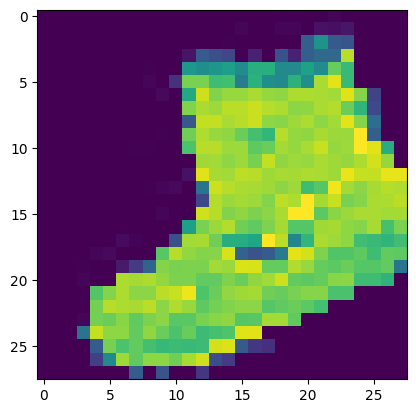

In [175]:
# rotation된 이미지
plt.imshow(transform(fashion[0][0]).permute(1, 2, 0))

# Transfer Learning

## VGG

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcDWppF%2FbtqKZnWPw48%2FKYuJj2xJVC2DQw5IoaPCy0%2Fimg.png)

Oxford 대학의 Visual Geometry Group (VGG)에서 개발한 딥러닝 기반의 이미지 분류 모델. <br> VGG 모델은 2014년 ILSVRC 대회에서 뛰어난 성능을 보여주며 주목. <br>

<br>

<font style="font-size:18px"> 특징 </font>

깊은 네트워크: VGG 모델은 여러 개의 convolutional layers와 pooling layers를 쌓아 깊은 네트워크를 구성. <br>
-> 기본 구조는 단순하지만 깊이가 깊어질수록 더 복잡한 특징 학습 가능. <br>
ex) VGG16과 VGG19

<br>

<font style="font-size:18px"> 사용 방법 </font>

> ```python
> # vgg16 모델 로드
> vgg16 = models.vgg16(pretrained=True)  # 사전 학습된 가중치 사용
> vgg16.eval()                           # 평가 모드로 설정
> 
> # vgg19 모델 로드
> vgg19 = models.vgg19(pretrained=True)  # 사전 학습된 가중치 사용
> vgg19.eval()                           # 평가 모드로 설정
> ```

## Resnet

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*C8jf92MeHZnxnbpMkz6jkQ.png" width="500">

Microsoft Research에서 개발된 딥러닝 모델. <br>
2015년 ILSVRC 대회에서 우수한 성능을 기록하며 주목. <br>

<br>

<font style="font-size:18px"> 특징 </font>

Residual Connection: 잔차 블록은 입력을 출력에 더하는 residual connection을 사용. <br>
-> 이를 통해 모델이 학습해야 할 것은 입력과 출력 간의 차이, 즉 잔차(residual)만이 됨. <br>
-> 이는 네트워크의 깊이가 깊어짐에 따라 발생하는 기울기 소실 문제 완화. <br>
-> 정보가 네트워크의 깊은 층까지 효과적으로 전파될 수 있게 하여, 모델 성능 향상. <br>

<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdBesUR%2FbtqVyUjjEyV%2FgCqE4ukhiXR2J0yw70xpOK%2Fimg.png" width="400">

깊은 네트워크: ResNet은 수백 개의 레이어로 구성된 매우 깊은 네트워크로도 구성. <br>
ex) ResNet-50, ResNet-101, ResNet-152: 각각 50, 101, 152개의 레이어 포함

<br>

<font style="font-size:18px"> 사용 방법 </font>

> ```python
> # ResNet-18 모델 로드
> resnet18 = models.resnet18(pretrained=True)  # 사전 학습된 가중치 사용
> resnet18.eval()  # 평가 모드 설정
> 
> # ResNet-50 모델 로드
> resnet50 = models.resnet50(pretrained=True)  # 사전 학습된 가중치 사용
> resnet50.eval()    # 평가 모드 설정
> ```

## Practice

In [181]:
# VGG19 모델 불러오기 (사전 학습된 가중치 사용)
model = models.vgg19(pretrained=True)

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [191]:
# 모든 매개변수의 requires_grad 속성을 False로 설정하여 미세 조정 불가능
for parameter in model.parameters():
    parameter.requires_grad = False

# VGG19 모델의 마지막 분류 계층을 새로운 nn.Linear 레이어로 교체
# 4096은 이전 계층의 출력 크기, 100은 새로운 클래스 수
model.classifier[-1] = nn.Linear(4096, 100)

In [193]:
## CIFAR100에서 resnet 모델을 통한 fine-tuning
model = models.resnet18(pretrained=True)

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [194]:
# 모델 구조 확인
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  